<a href="https://colab.research.google.com/github/Takouabelwafa/Test-Technique-Full-Pack-AI-/blob/main/Test_Technique_Task1%26QCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Technique  projet 1 + QCM

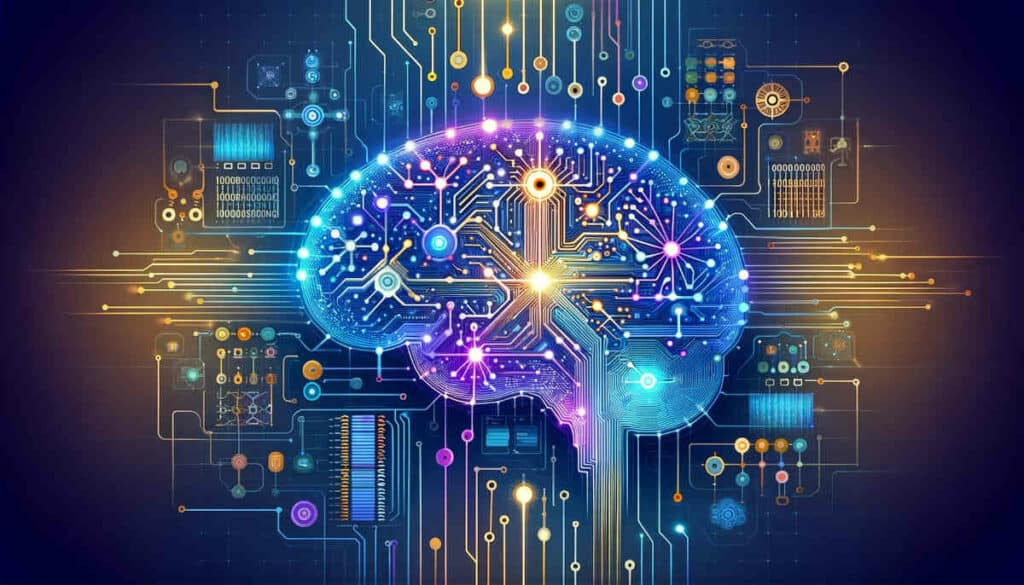

# QCM

---



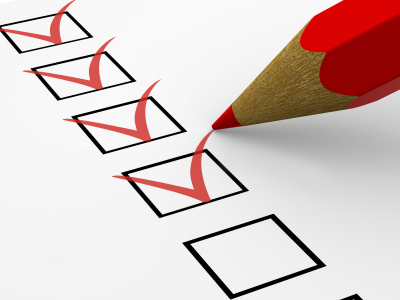

📊 1-4 : Data Analysis
1. Que renvoie la méthode .groupby() dans pandas ?

C. Un objet regroupé par clé

2. Quelle méthode calcule la médiane d'une colonne ?

B. median()

3. Quel type de graphique est idéal pour analyser une distribution ?

B. Boxplot

4. Quel code remplace les NaN dans une colonne par 0 ?

A. df.fillna(0)


🤖 5-8 : Machine Learning
5. Quel algorithme est non-linéaire ?

C. Decision Tree

6. Pourquoi utilise-t-on un split train/test ?

B. Pour évaluer la généralisation du modèle

7. Quelle métrique est la plus adaptée si les classes sont déséquilibrées ?
D. F1-score

8. Que fait le paramètre max_depth dans un arbre ?

B. Limite la profondeur de l'arbre


🖼️ 9-12 : Computer Vision
9. Quelle est la taille des images dans le dataset MNIST ?
C. 28x28

10. Quelle bibliothèque est utilisée pour charger des images en OpenCV ?
B. cv2

11. Que fait une convolution dans un CNN ?

C. Elle extrait des motifs

12. Quelle couche suit généralement une couche convolution ?

D. MaxPooling

🧠 13-16 : Deep Learning / NLP
13. Que retourne une couche Embedding ?

C. Un vecteur dense

14. Quelle est la fonction d'activation la plus utilisée en NLP ?

C. Softmax

15. Que permet le padding dans les séquences NLP ?

C. Uniformiser la longueur des phrases

16. Quelle fonction compile un modèle Keras ?

B. model.compile()


📚 17-20 : LLM / Transformers
17. Que veut dire “LLM” ?

C. Large Language Model

18. Quel est le rôle du tokenizer ?

C. Convertir du texte en tokens

19. Quel modèle est auto-régressif ?

C. GPT

20. Quelle bibliothèque gère les LLMs open source ?

C. transformers




`

# Projet 1: Projet 1 — Prédiction de la fraude bancaire avec XGBoost

**Objectif :** Détecter les transactions frauduleuses sur carte bancaire         
**Techniques :** XGBoost, SMOTE, GridSearch, AUC-ROC                            
• 📦 **Dataset**:                                                              
Credit Card Fraud Detection                                         

# **•🔧 Tâches :**


**•Analyse EDA**                                                                
L'EDA consiste à examiner, visualiser et résumer les principales caractéristiques d'un dataset afin d'identifier :


*   les structures cachées
*   les tendances
*   les anomalies
*   les relations entre les variables
*   la qualité des données













In [ ]:
# Importer les bibliothéque nessaire
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# Connecter au drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importer la dataset

data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")


📋 **Description des colonnes**

 | Colonne      | Signification                                                                                   | Détails techniques                                                                                                                                                                                                                   |
| ------------ | ----------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Time**     | Temps écoulé (en secondes) entre la première transaction du dataset et la transaction courante. | Sert à l'analyse temporelle ; il n'a pas été standardisé dans le jeu original.                                                                                                                                                       |
| **V1 à V28** | Variables **anonymisées** obtenues par **Analyse en Composantes Principales (PCA)**.            | Les données d'origine (montant, commerçant, type de transaction, etc.) ont été transformées pour préserver la confidentialité. Ces variables représentent donc des **composantes synthétiques** issues de la réduction de dimension. |
| **Amount**   | Montant de la transaction en euros (€).                                                         | Peut être standardisé pour améliorer la performance du modèle.                                                                                                                                                                       |
| **Class**    | Étiquette cible : <br> `0` = transaction normale, <br> `1` = transaction frauduleuse.           | Très déséquilibrée (~1 fraude sur 2000 transactions).                                                                                                                                                                                |


In [ ]:
#infotmation générale
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# convertir la time en timeDate
data['TimeDate'] = pd.to_datetime('2020-01-01') + pd.to_timedelta(data['Time'], unit='s')

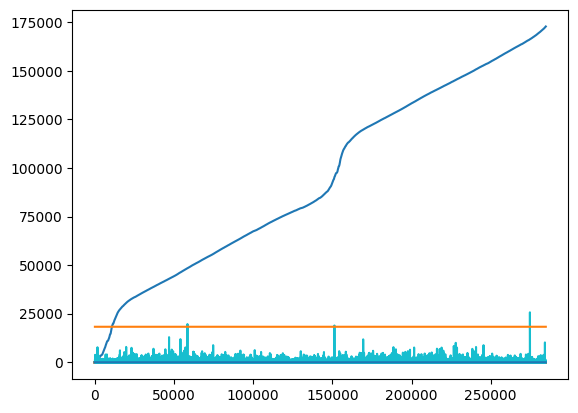

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
print(data['Class'].value_counts())
# 1  transactions frauduleuses
#0  transactions  non frauduleuses


Class
0    284315
1       492
Name: count, dtype: int64


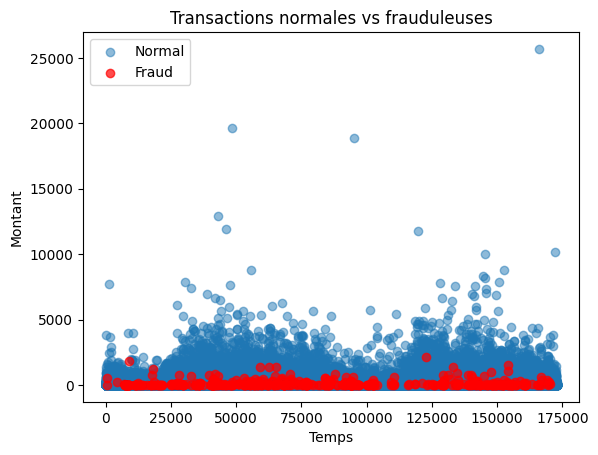

In [ ]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]


plt.scatter(non_fraud['Time'], non_fraud['Amount'], label='Normal', alpha=0.5)
plt.scatter(fraud['Time'], fraud['Amount'], label='Fraud', color='red', alpha=0.7)
plt.title("Transactions normales vs frauduleuses")
plt.xlabel("Temps")
plt.ylabel("Montant")
plt.legend()
plt.show()


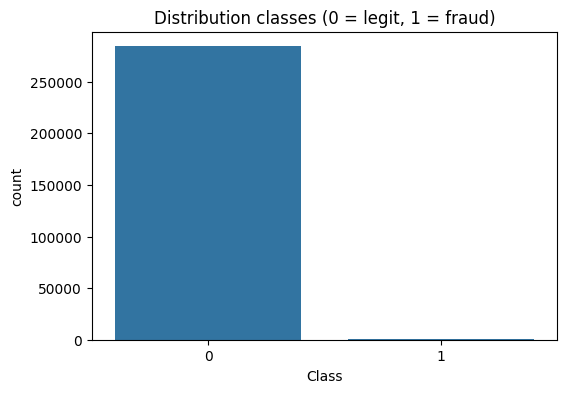

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=data)
ax.set_title('Distribution classes (0 = legit, 1 = fraud)')
plt.show()




In [ ]:
print(data.describe().T)

             count                           mean                  min  \
Time      284807.0                   94813.859575                  0.0   
V1        284807.0                            0.0            -56.40751   
V2        284807.0                            0.0           -72.715728   
V3        284807.0                           -0.0           -48.325589   
V4        284807.0                            0.0            -5.683171   
V5        284807.0                            0.0          -113.743307   
V6        284807.0                            0.0           -26.160506   
V7        284807.0                           -0.0           -43.557242   
V8        284807.0                            0.0           -73.216718   
V9        284807.0                           -0.0           -13.434066   
V10       284807.0                            0.0           -24.588262   
V11       284807.0                            0.0            -4.797473   
V12       284807.0                    

<Axes: ylabel='V1'>

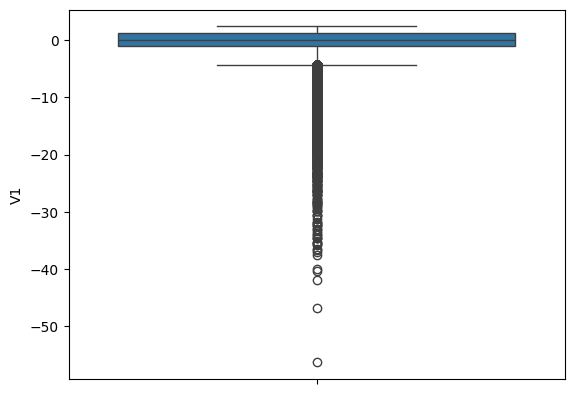

In [ ]:
#visualiser les valeurs adérantes
sns.boxplot(data['V1'])



In [ ]:
from scipy.stats.mstats import winsorize
# Colonnes PCA
pca_cols = [f'V{i}' for i in range(1, 29)]
for col in pca_cols:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])  # 1% à gauche et droite
    for col in pca_cols:
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR
      median = data[col].median()
      data[col] = np.where(data[col] < lower, median, data[col])
      data[col] = np.where(data[col] > upper, median, data[col])



/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

<Axes: ylabel='V1'>

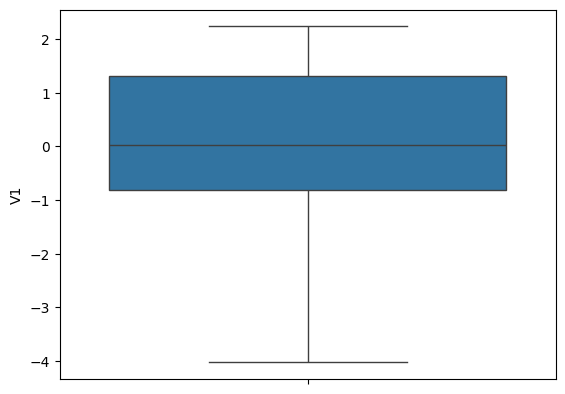

In [ ]:
#Vérifier la correction de valeurs adérantes
sns.boxplot(data['V1'])

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()


corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TimeDate
Time,1.000000,0.156510,-0.018532,-0.480740,-0.163092,0.219219,-0.129987,0.114312,NaN,0.017686,...,0.147904,0.176441,-0.005526,-0.249315,0.034807,NaN,NaN,-0.010596,-0.012323,1.000000
V1,0.156510,1.000000,-0.406963,-0.411673,0.130442,-0.137648,-0.059867,-0.255624,NaN,0.147838,...,-0.044636,0.194659,0.001149,0.085060,-0.021320,NaN,NaN,-0.118309,-0.022326,0.156510
V2,-0.018532,-0.406963,1.000000,0.072868,0.166984,0.372640,-0.104694,0.467284,NaN,-0.057745,...,-0.049941,-0.100664,0.010154,-0.088987,0.074125,NaN,NaN,-0.205208,0.023985,-0.018532
V3,-0.480740,-0.411673,0.072868,1.000000,0.045958,-0.233559,0.278339,-0.089596,NaN,-0.014751,...,-0.007084,-0.170682,-0.011030,0.019273,-0.039421,NaN,NaN,-0.096038,-0.013575,-0.480740
V4,-0.163092,0.130442,0.166984,0.045958,1.000000,0.040576,0.109016,0.083529,NaN,0.167325,...,-0.037250,0.007979,-0.011944,0.082976,-0.094503,NaN,NaN,0.044759,0.020278,-0.163092
V5,0.219219,-0.137648,0.372640,-0.233559,0.040576,1.000000,-0.134177,0.475245,NaN,-0.039583,...,-0.002162,-0.115321,-0.070863,-0.011888,0.058245,NaN,NaN,-0.153937,-0.005143,0.219219
V6,-0.129987,-0.059867,-0.104694,0.278339,0.109016,-0.134177,1.000000,-0.276883,NaN,0.037085,...,0.038846,-0.073481,-0.241044,-0.016404,-0.049105,NaN,NaN,0.092500,-0.012022,-0.129987
V7,0.114312,-0.255624,0.467284,-0.089596,0.083529,0.475245,-0.276883,1.000000,NaN,-0.075454,...,-0.025577,-0.190444,-0.013810,-0.032874,0.037278,NaN,NaN,0.068509,-0.006559,0.114312
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,0.017686,0.147838,-0.057745,-0.014751,0.167325,-0.039583,0.037085,-0.075454,NaN,1.000000,...,0.002091,0.068535,-0.000303,-0.025559,0.014172,NaN,NaN,-0.037294,-0.015981,0.017686


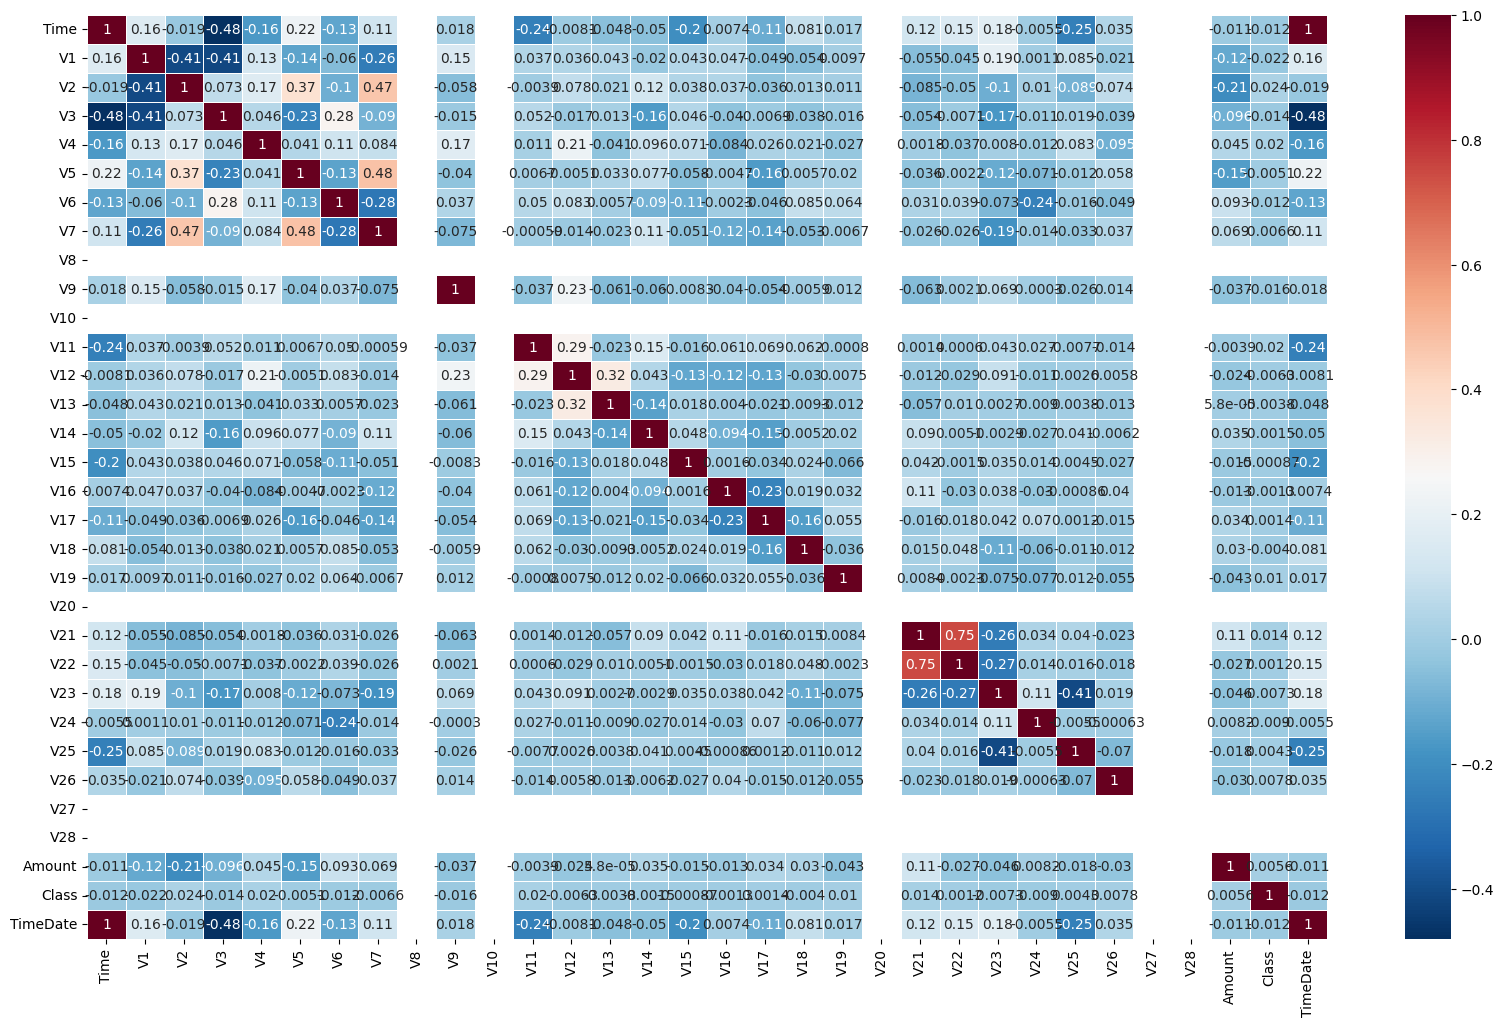

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(data.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [ ]:
data = data.drop(['V8','V20','V27','V28','V10'], axis=1)

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()


corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V11,...,V19,V21,V22,V23,V24,V25,V26,Amount,Class,TimeDate
Time,1.000000,0.156510,-0.018532,-0.480740,-0.163092,0.219219,-0.129987,0.114312,0.017686,-0.244926,...,0.017490,0.115352,0.147904,0.176441,-0.005526,-0.249315,0.034807,-0.010596,-0.012323,1.000000
V1,0.156510,1.000000,-0.406963,-0.411673,0.130442,-0.137648,-0.059867,-0.255624,0.147838,0.037198,...,0.009690,-0.054693,-0.044636,0.194659,0.001149,0.085060,-0.021320,-0.118309,-0.022326,0.156510
V2,-0.018532,-0.406963,1.000000,0.072868,0.166984,0.372640,-0.104694,0.467284,-0.057745,-0.003882,...,0.010560,-0.084578,-0.049941,-0.100664,0.010154,-0.088987,0.074125,-0.205208,0.023985,-0.018532
V3,-0.480740,-0.411673,0.072868,1.000000,0.045958,-0.233559,0.278339,-0.089596,-0.014751,0.051877,...,-0.016016,-0.053969,-0.007084,-0.170682,-0.011030,0.019273,-0.039421,-0.096038,-0.013575,-0.480740
V4,-0.163092,0.130442,0.166984,0.045958,1.000000,0.040576,0.109016,0.083529,0.167325,0.011273,...,-0.027152,0.001776,-0.037250,0.007979,-0.011944,0.082976,-0.094503,0.044759,0.020278,-0.163092
V5,0.219219,-0.137648,0.372640,-0.233559,0.040576,1.000000,-0.134177,0.475245,-0.039583,0.006727,...,0.019896,-0.035638,-0.002162,-0.115321,-0.070863,-0.011888,0.058245,-0.153937,-0.005143,0.219219
V6,-0.129987,-0.059867,-0.104694,0.278339,0.109016,-0.134177,1.000000,-0.276883,0.037085,0.050238,...,0.063566,0.030642,0.038846,-0.073481,-0.241044,-0.016404,-0.049105,0.092500,-0.012022,-0.129987
V7,0.114312,-0.255624,0.467284,-0.089596,0.083529,0.475245,-0.276883,1.000000,-0.075454,-0.000592,...,-0.006728,-0.025530,-0.025577,-0.190444,-0.013810,-0.032874,0.037278,0.068509,-0.006559,0.114312
V9,0.017686,0.147838,-0.057745,-0.014751,0.167325,-0.039583,0.037085,-0.075454,1.000000,-0.036910,...,0.012486,-0.062534,0.002091,0.068535,-0.000303,-0.025559,0.014172,-0.037294,-0.015981,0.017686
V11,-0.244926,0.037198,-0.003882,0.051877,0.011273,0.006727,0.050238,-0.000592,-0.036910,1.000000,...,-0.000800,0.001431,0.000605,0.043240,0.027429,-0.007699,-0.013632,-0.003893,0.019975,-0.244926


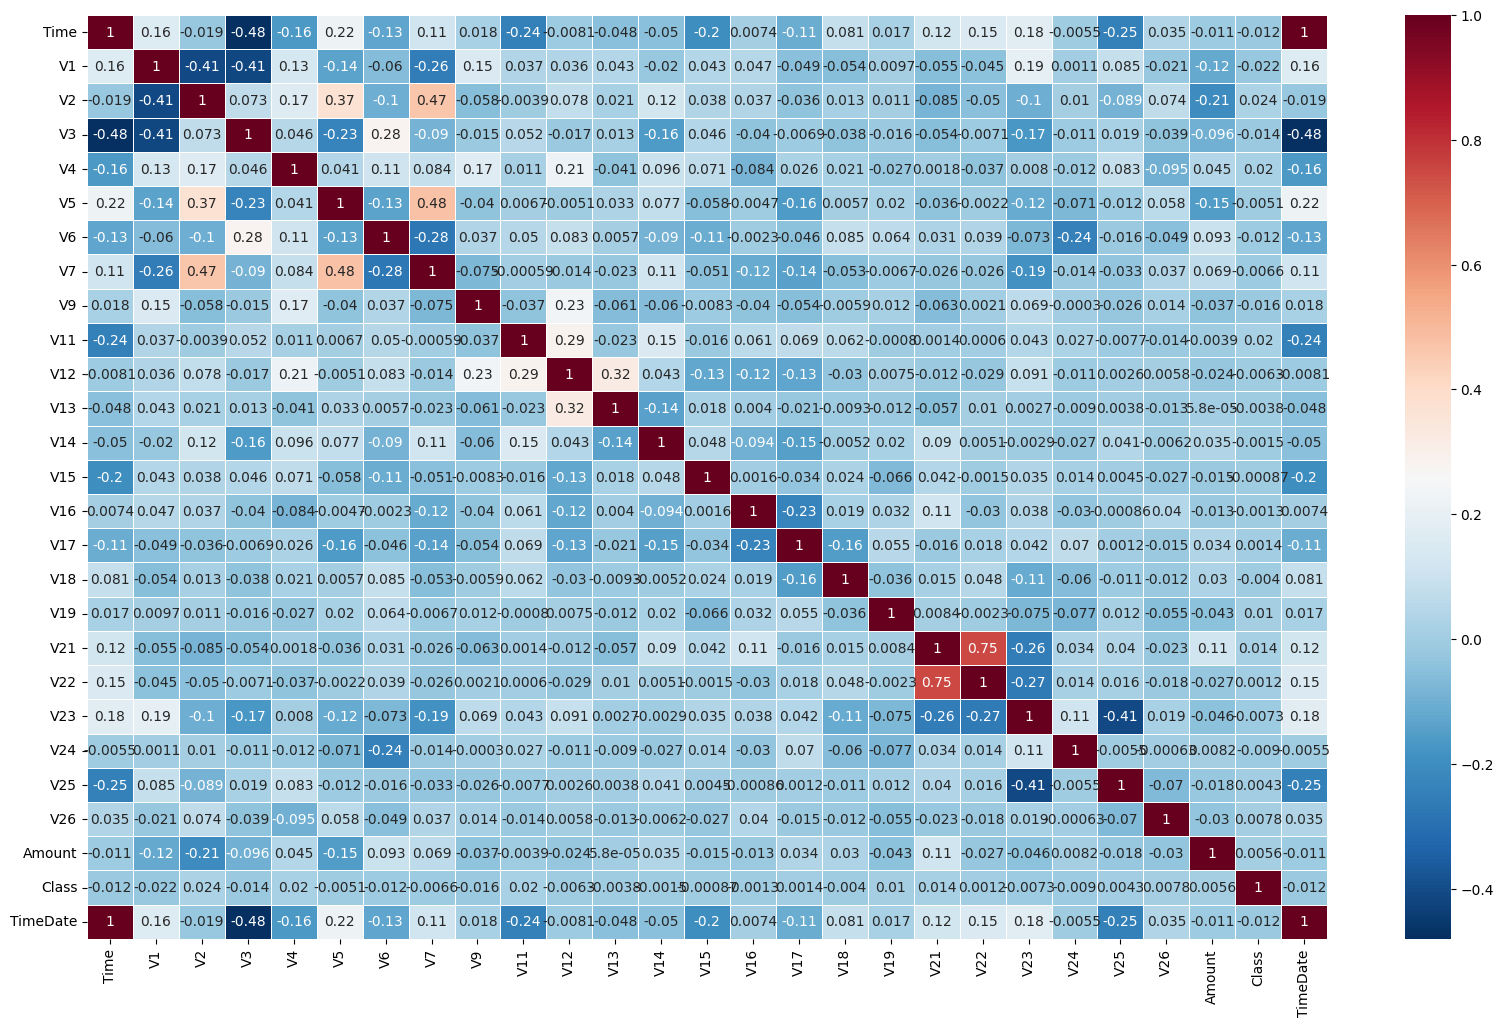

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(data.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

**•SMOTE pour équilibrer**


⚖️ SMOTE : Synthetic Minority Over-sampling Technique

SMOTE (Synthetic Minority Over-sampling Technique) est une méthode de rééchantillonnage utilisée pour équilibrer les classes dans un jeu de données déséquilibré — par exemple, lorsqu'on a beaucoup plus d'exemples de la classe « non frauduleuse » que de la classe « frauduleuse » dans un dataset de détection de fraude.

🔍 Principe

Au lieu de dupliquer les exemples minoritaires, SMOTE génère artificiellement de nouveaux exemples synthétiques en :
1.  Choisissant un point de la classe minoritaire.
2.  Sélectionnant un ou plusieurs voisins proches (k-nearest neighbors).
3.  Créant un nouvel échantillon le long du segment reliant le point choisi à l'un de ses voisins.
Cela permet d'enrichir la classe minoritaire tout en évitant le surapprentissage dû à la simple duplication.

Répartition avant SMOTE : Counter({0: 199020, 1: 344})


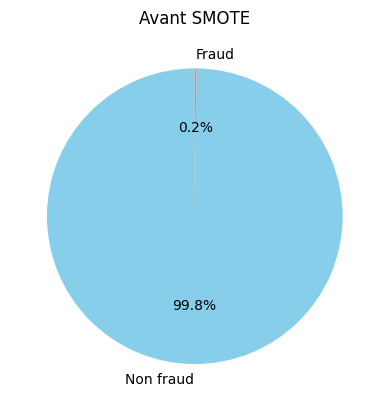

Répartition après SMOTE : Counter({0: 199020, 1: 199020})


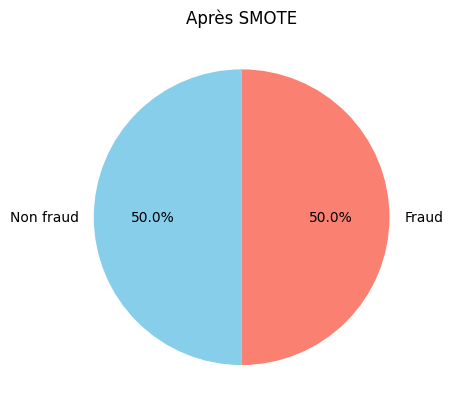

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Séparation des variables ---
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

# ✅ Supprimer ou convertir toute colonne non numérique
X = X.select_dtypes(include=[np.number])

# --- Division train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Avant SMOTE ---
counter_train = Counter(y_train)
print("Répartition avant SMOTE :", counter_train)

plt.pie(
    y_train.value_counts(),
    labels=['Non fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title("Avant SMOTE")
plt.show()

# --- Application du SMOTE ---
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# --- Après SMOTE ---
counter_res = Counter(y_res)
print("Répartition après SMOTE :", counter_res)

plt.pie(
    list(counter_res.values()),
    labels=['Non fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title("Après SMOTE")
plt.show()


📊 Avantages

Évite le surapprentissage lié à la duplication.

Améliore la capacité de généralisation du modèle.

Compatible avec de nombreux algorithmes (RandomForest, XGBoost, LogisticRegression…).

⚠️ Limites

Peut créer du bruit si les classes se chevauchent.

Risque d'overfitting si la séparation entre classes est mal définie.

À utiliser uniquement sur les données d'entraînement (jamais sur le test set).

**•XGBoost tuning**


⚙️ 1. Qu'est-ce que le tuning XGBoost ?

Le tuning consiste à ajuster les hyperparamètres du modèle pour obtenir le meilleur compromis entre biais et variance (donc meilleure performance sur les données test).
Les paramètres par défaut de XGBoost ne sont pas optimaux pour tous les jeux de données, surtout s'ils sont déséquilibrés.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Entraînement du modèle XGBoost ---
model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_res, y_res)

# --- Prédictions ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:33:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**•Explication des variables importantes**


| Catégorie                | Paramètre                     | Rôle                                                                    |
| ------------------------ | ----------------------------- | ----------------------------------------------------------------------- |
| **Structure de l'arbre** | `max_depth`                   | Profondeur maximale des arbres. Trop haut → surapprentissage.           |
|                          | `min_child_weight`            | Nombre minimal d'exemples par feuille.                                  |
| **Taux d'apprentissage** | `learning_rate` (alias `eta`) | Poids donné à chaque nouvel arbre. Petits → plus lent mais plus stable. |
| **Sous-échantillonnage** | `subsample`                   | Fraction d'échantillons utilisés par arbre.                             |
|                          | `colsample_bytree`            | Fraction de colonnes utilisées par arbre.                               |
| **Régularisation**       | `gamma`, `lambda`, `alpha`    | Contrôlent la pénalisation pour éviter le surapprentissage.             |
| **Nombre d'arbres**      | `n_estimators`                | Nombre total d'arbres à construire.                                     |


**•Visualisation ROC + confusion matrix**

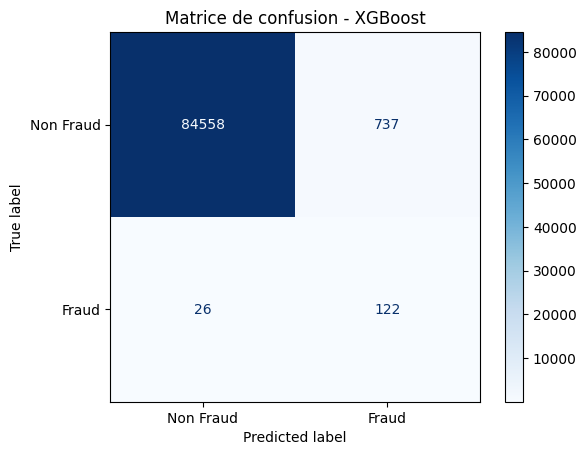


📊 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.82      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.62     85443
weighted avg       1.00      0.99      0.99     85443


📊 matrice de confexion :
 [[84558   737]
 [   26   122]]


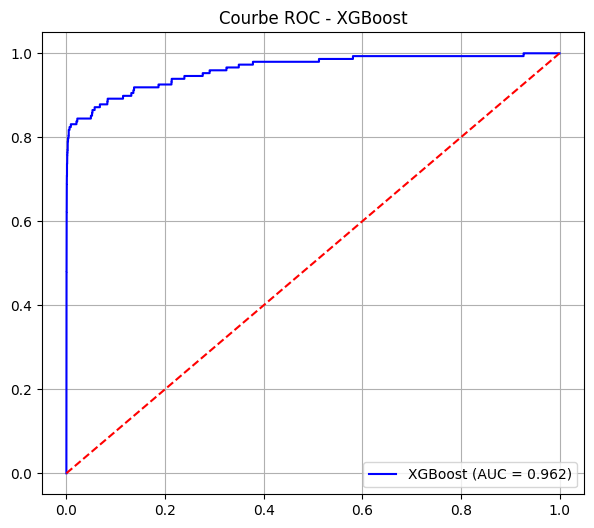

🎯 AUC = 0.962
✅ Accuracy = 0.991


In [ ]:
# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - XGBoost")
plt.show()

# --- Rapport de classification ---

print("\n📊 Rapport de classification :\n", classification_report(y_test, y_pred))
print("\n📊 matrice de confexion :\n", cm)
# --- Courbe ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title("Courbe ROC - XGBoost")

plt.legend()
plt.grid(True)
plt.show()

print(f"🎯 AUC = {roc_auc:.3f}")
print(f"✅ Accuracy = {accuracy_score(y_test, y_pred):.3f}")

**Interprétation et conclusion**



      -Le modèle détecte presque toutes les fraudes (rappel = 0.96).

      - Le modèle conserve une très haute performance sur les transactions normales.

      - SMOTE a bien amélioré la sensibilité aux fraudes.



